# Matrix Multiplication from Scratch

The objective is for kurian to implement matrix multiplication from scratch

In [1]:
import pickle
import gzip
import urllib.request
from pathlib import Path
from itertools import islice

import torch
import matplotlib.pyplot as plt
torch.set_printoptions(linewidth=140, precision=2)

## Getting data, visualizing and chunking into 28*28

In [2]:
MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
data_path = Path("../data")
data_path.mkdir(exist_ok=True)

In [3]:
import urllib.request

In [4]:
local_filename, headers = urllib.request.urlretrieve('http://python.org/')
local_filename

'/tmp/tmp5pj0nsjp'

In [9]:
urllib.request.urlretrieve('https://python.org/')

('/tmp/tmp_egommr7', <http.client.HTTPMessage at 0x7feb0707f370>)

In [6]:
html = open(local_filename); html

<_io.TextIOWrapper name='/tmp/tmp5pj0nsjp' mode='r' encoding='UTF-8'>

In [7]:
html.close()

In [10]:
urllib.request.urlretrieve(MNIST_URL)

('/tmp/tmp4ezaea14', <http.client.HTTPMessage at 0x7feb0707f100>)

In [18]:
urllib.request.urlretrieve?

Signature: urllib.request.urlretrieve(url, filename=None, reporthook=None, data=None)
Docstring:
Retrieve a URL into a temporary location on disk.

Requires a URL argument. If a filename is passed, it is used as
the temporary file location. The reporthook argument should be
a callable that accepts a block number, a read size, and the
total file size of the URL target. The data argument should be
valid URL encoded data.

If a filename is passed and the URL points to a local resource,
the result is a copy from local file to new file.

Returns a tuple containing the path to the newly created
data file as well as the resulting HTTPMessage object.
File:      /opt/conda/lib/python3.8/urllib/request.py
Type:      function


Latest equivalent in python3

In [22]:
import urllib.request
import urllib.parse
# params = urllib.parse.urlencode({'spam': 1, 'eggs': 2, 'bacon': 0})
url = "https://kurianbenoy.com"
with urllib.request.urlopen(url) as f:
    print(f.read().decode('utf-8'))

<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml" lang="en" xml:lang="en"><head>

<meta charset="utf-8">
<meta name="generator" content="quarto-1.2.280">

<meta name="viewport" content="width=device-width, initial-scale=1.0, user-scalable=yes">


<title>Kurian Benoy</title>
<style>
code{white-space: pre-wrap;}
span.smallcaps{font-variant: small-caps;}
div.columns{display: flex; gap: min(4vw, 1.5em);}
div.column{flex: auto; overflow-x: auto;}
div.hanging-indent{margin-left: 1.5em; text-indent: -1.5em;}
ul.task-list{list-style: none;}
ul.task-list li input[type="checkbox"] {
  width: 0.8em;
  margin: 0 0.8em 0.2em -1.6em;
  vertical-align: middle;
}
</style>


<script src="site_libs/quarto-nav/quarto-nav.js"></script>
<script src="site_libs/quarto-nav/headroom.min.js"></script>
<script src="site_libs/clipboard/clipboard.min.js"></script>
<script src="site_libs/quarto-search/autocomplete.umd.js"></script>
<script src="site_libs/quarto-search/fuse.min.js"></script>
<script src="si

In [25]:
with urllib.request.urlopen(MNIST_URL) as f:
    print(f.read())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
data_gz = data_path/'mnist.pkl.gz'

In [12]:
urllib.request.urlretrieve(MNIST_URL, data_gz)

(PosixPath('../data/mnist.pkl.gz'),
 <http.client.HTTPMessage at 0x7feb0707f430>)

In [13]:
[x for x in data_path.iterdir()]

[PosixPath('../data/mnist.pkl.gz')]

In [13]:
with gzip.open(data_gz, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), (x_test, y_test)) = pickle.load(f, encoding='latin1')

In [14]:
x_train.shape

(50000, 784)

In [15]:
x_valid.shape

(10000, 784)

In [16]:
x_test.shape

(10000, 784)

In [10]:
img1 = list(x_train[100]); img1[:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [11]:
# for i in range(784):
#     print(i)

In [17]:
len(img1)/28

28.0

In [25]:
def chunks(item, chunk_size):
    for i in range(len(item)//chunk_size):
        yield item[i*chunk_size:i*chunk_size+chunk_size]

In [28]:
val_iter = chunks(img1, 28); iter(val_iter)

<generator object chunks at 0x7f8d102e57b0>

In [29]:
next(val_iter)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [31]:
len(list(chunks(img1, 28)))

28

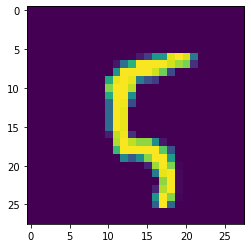

In [32]:
plt.imshow(list(chunks(img1, 28)))

In [36]:
islice(img1, 28)

In [52]:
list(islice(img1, 28))

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [41]:
vals = iter(img1)
islice(vals, 28)

In [60]:
list(islice(vals, 28))

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05859375,
 0.3671875,
 0.63671875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.9296875,
 0.8515625,
 0.796875,
 0.13671875,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [61]:
class Matrix:
    def __init__(self, item: list):
        self.item = item
    def __getitem__(self, index: list):
        return self.item[index[0]][index[1]]
    
    def __len__(self):
        print(len(self.item[0]))
        return len(self.item)

In [62]:
x = [[1,2,3], [4,5,6]]
y  = [[1,2], [3,4],[5,6]]

In [63]:
a1 = Matrix(x)
a1[0,2]

3

In [64]:
len(a1)

3


2

In [65]:
a2= Matrix(y)

In [66]:
len(a2)

2


3

In [70]:
(x_train, y_train, x_valid, y_valid) = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

/tmp/ipykernel_999/36036253.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  (x_train, y_train, x_valid, y_valid) = map(torch.tensor, (x_train, y_train, x_valid, y_valid))


In [71]:
x_train.shape

torch.Size([50000, 784])

In [72]:
x_valid.shape

torch.Size([10000, 784])

In [73]:
x_train.reshape((-1,28,28))

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

In [74]:
x_train.reshape((50000,28,28)).shape

torch.Size([50000, 28, 28])

In [75]:
y_train.shape

torch.Size([50000])

In [76]:
weight = torch.randn(784, 10)
weight.shape

torch.Size([784, 10])

In [77]:
x_train[0,0]*weight[0,3]

tensor(-0.)

In [80]:
x_sample = x_train[:50]

In [81]:
weight

tensor([[ 0.28,  0.36,  0.68,  ..., -0.07, -1.08, -0.30],
        [-0.32,  0.11,  0.41,  ..., -0.39,  0.62,  1.13],
        [-0.24, -0.81, -0.35,  ..., -2.54,  0.69, -1.40],
        ...,
        [-0.77,  0.19,  0.27,  ...,  0.21,  0.03,  0.75],
        [-1.31,  0.32, -0.11,  ...,  0.52, -0.32,  0.53],
        [-0.94,  1.07,  0.66,  ..., -0.07, -0.99,  0.67]])

In [82]:
i, j = x_sample.shape
j, k= weight.shape
res = torch.zeros(i, k)
res.shape

torch.Size([50, 10])

In [83]:
%%time
for a in range(i):
    for b in range(j):
        for c in range(k):
            # print(x_train[a,b])
            res[a,c] += x_sample[a,b]*weight[b,c]

CPU times: user 5.27 s, sys: 8.45 ms, total: 5.27 s
Wall time: 5.27 s


In [84]:
res

tensor([[ 2.57e+00,  5.00e+00, -8.27e+00,  1.59e+00, -5.12e+00,  7.71e+00,  6.84e-01,  1.00e+01,  5.13e+00,  2.13e+01],
        [ 4.53e+00,  1.06e+01, -3.09e+00, -4.67e+00,  4.78e+00,  8.66e-01,  4.59e+00, -3.68e-01, -5.47e+00,  7.24e+00],
        [ 1.70e+01,  1.91e+01,  3.68e+00, -2.57e+00, -1.18e+01, -7.42e+00, -1.40e+00,  2.53e+00, -1.03e+01,  1.51e+01],
        [-6.57e+00, -1.42e-02, -3.39e+00, -1.18e+01,  5.33e+00, -1.26e+00,  2.33e+00,  1.86e+00, -5.02e+00,  8.04e+00],
        [ 3.01e+00,  3.39e+00, -1.22e+01,  1.59e+00,  1.14e+01, -8.65e+00, -9.15e+00,  7.24e+00, -3.08e+00,  1.36e+01],
        [-8.92e+00,  7.72e+00, -1.43e+01, -2.77e+00,  1.14e+01,  8.26e+00, -6.70e+00,  8.36e+00, -7.69e+00,  1.90e+01],
        [-6.26e+00,  7.07e+00, -2.46e+01,  5.81e-01, -2.03e+00, -5.23e+00, -8.02e+00,  7.74e+00, -1.81e+00,  1.40e+01],
        [ 6.10e+00,  1.04e+01, -1.18e+01, -1.17e+01,  3.09e+00,  9.71e-01, -2.71e+00,  1.20e+01, -1.27e+01,  2.58e+01],
        [-5.90e+00,  5.85e+00, -1.31e+01

### Resume

From https://youtu.be/6StU6UtZEbU?t=4900

Dot product optimization

In [85]:
%%time
for a in range(i):
    for c in range(k):
        # print(x_train[a,b])
        res[a,c] = (x_sample[a,:]*weight[:,c]).sum()

CPU times: user 15 ms, sys: 3.86 ms, total: 18.8 ms
Wall time: 16.5 ms


In [86]:
res

tensor([[ 2.57e+00,  5.00e+00, -8.27e+00,  1.59e+00, -5.12e+00,  7.71e+00,  6.84e-01,  1.00e+01,  5.13e+00,  2.13e+01],
        [ 4.53e+00,  1.06e+01, -3.09e+00, -4.67e+00,  4.78e+00,  8.66e-01,  4.59e+00, -3.68e-01, -5.47e+00,  7.24e+00],
        [ 1.70e+01,  1.91e+01,  3.68e+00, -2.57e+00, -1.18e+01, -7.42e+00, -1.40e+00,  2.53e+00, -1.03e+01,  1.51e+01],
        [-6.57e+00, -1.42e-02, -3.39e+00, -1.18e+01,  5.33e+00, -1.26e+00,  2.33e+00,  1.86e+00, -5.02e+00,  8.04e+00],
        [ 3.01e+00,  3.39e+00, -1.22e+01,  1.59e+00,  1.14e+01, -8.65e+00, -9.15e+00,  7.24e+00, -3.08e+00,  1.36e+01],
        [-8.92e+00,  7.72e+00, -1.43e+01, -2.77e+00,  1.14e+01,  8.26e+00, -6.70e+00,  8.36e+00, -7.69e+00,  1.90e+01],
        [-6.26e+00,  7.07e+00, -2.46e+01,  5.81e-01, -2.03e+00, -5.23e+00, -8.02e+00,  7.74e+00, -1.81e+00,  1.40e+01],
        [ 6.10e+00,  1.04e+01, -1.18e+01, -1.17e+01,  3.09e+00,  9.71e-01, -2.71e+00,  1.20e+01, -1.27e+01,  2.58e+01],
        [-5.90e+00,  5.85e+00, -1.31e+01

## Numba

In [87]:
from numba import njit

## APL method

## Torch.einsum

## Matrix broadcasting

## Important:

- Rules for matrix broadcasting
- Rules for einsum